In [3]:
import numpy as np
import matplotlib.pyplot as plt

from CartPole import CartPole

cp = CartPole()

In [4]:
# Generating data points for training the nonlinear model


def XY_data_generation(n, seeds):
    """
    Function for generating (X, Y) datapoints, used for model training.
       
    Target function Y is chosen to be the change in state after performAction()
    """
    X = []
    low = [-10,-10,-np.pi,-15]
    high = [10,10,np.pi,15]
    for i in range(4):
        np.random.seed(seeds[i])
        X.append(np.random.uniform(low[i], high[i], n))
    X = np.array(X).T

    Y = []

    for i in range(n):
        x = X[i]
        cp.setState(x)
        cp.performAction() 
        Y.append(cp.getState() - x)

    return np.array(X), np.array(Y)

def XY_data_generation_action(n, seeds):
    """
    Function for generating (X, Y) datapoints, used for model training.
    Target function Y is chosen to be the change in state after performAction()
    """
    X = []
    # Set the lower and upper bounds for the various state variables
    low = [-10,-10,-np.pi,-15,-10]
    high = [10,10,np.pi,15,10]
    for i in range(5):
        np.random.seed(seeds[i])
        X.append(np.random.uniform(low[i], high[i], n))
    X = np.array(X).T

    Y = []

    for i in range(n):
        x = X[i]
        cp.setState(x)
        cp.performAction(x[4]) # Including the force
        Y.append(cp.getState() - x[:4])

    return np.array(X), np.array(Y)

In [5]:
# Functions involved in computing the nonlinear model

def kernel_compute(X, Xp, sig):
    """
    Returns a matrix K of dimension N x M, where
    N = no. of datapoints
    M = no. of basis functions
    """
    K = np.zeros((len(X), len(Xp)))
    for i in range(len(X)):
        for j in range(len(Xp)):
            exp_cl = (X[i][0] - Xp[j][0])**2 / (2*sig[0]**2)
            exp_cv = (X[i][1] - Xp[j][1])**2 / (2*sig[1]**2)
            exp_pa = np.sin((X[i][2] - Xp[j][2])/2)**2 / (2*sig[2]**2)
            exp_pv = (X[i][3] - Xp[j][3])**2 / (2*sig[3]**2)
            exponent = exp_cl + exp_cv + exp_pa + exp_pv
            K[i][j] = np.exp(-1*exponent)
    return K


def nonlinear_model(X, Y, M, sig, lmda):
    """
    Non-linear model: Does the matrix operations involving nonlinear model
    Returns the M sized vector alpha_M, used to compute the predictions
    """
    Xp_indices = np.random.choice(len(X), size=M, replace=False, p=None)
    Xp = X[Xp_indices]
    K_NM = kernel_compute(X, Xp, sig)
    K_MN = K_NM.T
    K_MM = kernel_compute(Xp, Xp, sig)
    a = K_MN @ K_NM + lmda * K_MM
    b = K_MN @ Y

    alpha_M = np.linalg.lstsq(a, b, rcond=None)[0]

    return alpha_M, Xp

In [37]:
# Generate data:

seeds = [0,1,2,3,4] # Seeds for each state variable 
N_train = 1000    # We start with 1000 data points to train our nonlinear model

X_train, Y_train = XY_data_generation_action(N_train, seeds)

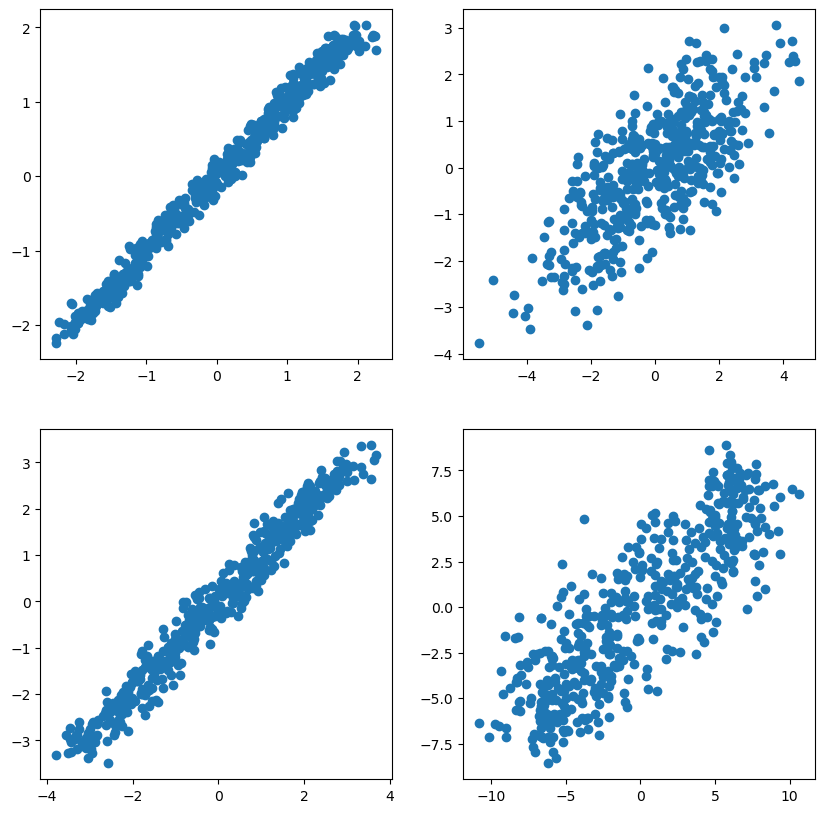

In [30]:
M = 100 # Number of basis functions 
lmda = 0.0001  # Preliminary value for the variance of the noise

std_list = []
for row in X_train.T:
    sq_mean = np.mean(np.square(row))
    mean = np.mean(row)
    variance = sq_mean - mean**2
    std_list.append(np.sqrt(variance))

alpha_M, Xp_train = nonlinear_model(X_train, Y_train, M, std_list, lmda)

K_NM = kernel_compute(X_train, Xp_train, std_list)

Y_pred = K_NM @ alpha_M

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(Y_train.T[0], Y_pred.T[0])
ax[0,1].scatter(Y_train.T[1], Y_pred.T[1])
ax[1,0].scatter(Y_train.T[2], Y_pred.T[2])
ax[1,1].scatter(Y_train.T[3], Y_pred.T[3])
plt.show()

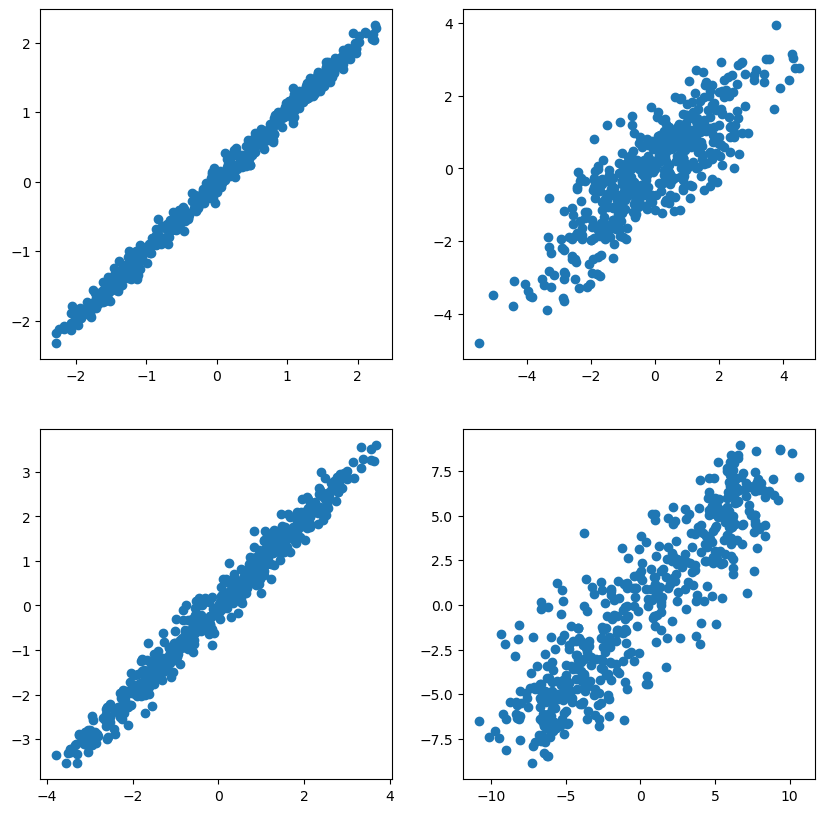

In [22]:
M = 200 # Number of basis functions 

alpha_M, Xp_train = nonlinear_model(X_train, Y_train, M, std_list, lmda)

K_NM = kernel_compute(X_train, Xp_train, std_list)

Y_pred = K_NM @ alpha_M

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(Y_train.T[0], Y_pred.T[0])
ax[0,1].scatter(Y_train.T[1], Y_pred.T[1])
ax[1,0].scatter(Y_train.T[2], Y_pred.T[2])
ax[1,1].scatter(Y_train.T[3], Y_pred.T[3])
plt.show()

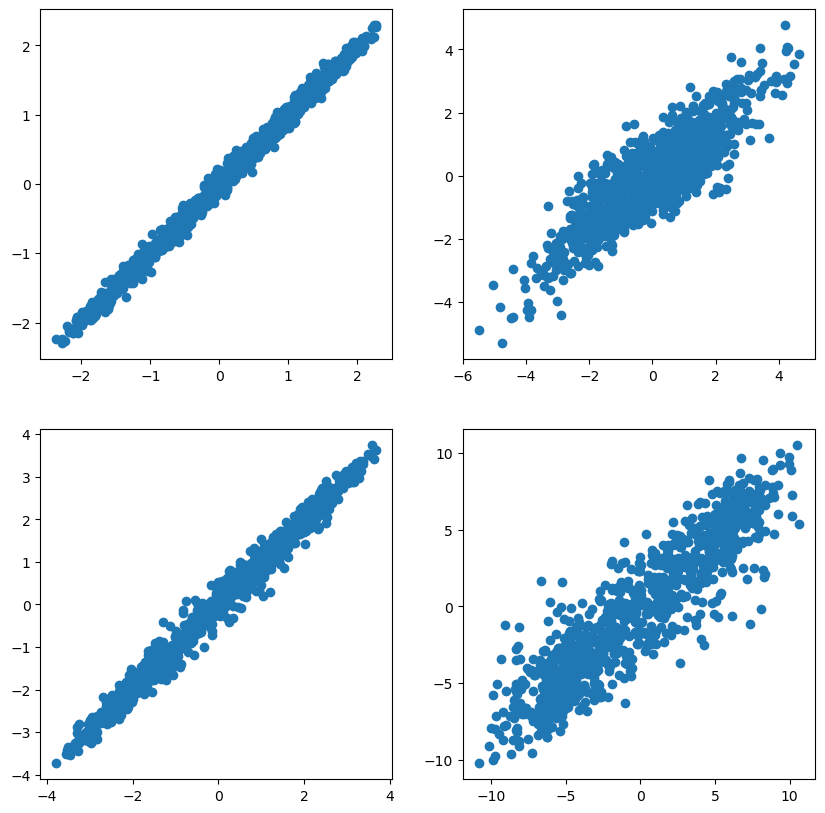

In [32]:
M = 500

alpha_M, Xp_train = nonlinear_model(X_train, Y_train, M, std_list, lmda)

K_NM = kernel_compute(X_train, Xp_train, std_list)

Y_pred = K_NM @ alpha_M

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(Y_train.T[0], Y_pred.T[0])
ax[0,1].scatter(Y_train.T[1], Y_pred.T[1])
ax[1,0].scatter(Y_train.T[2], Y_pred.T[2])
ax[1,1].scatter(Y_train.T[3], Y_pred.T[3])
plt.show()

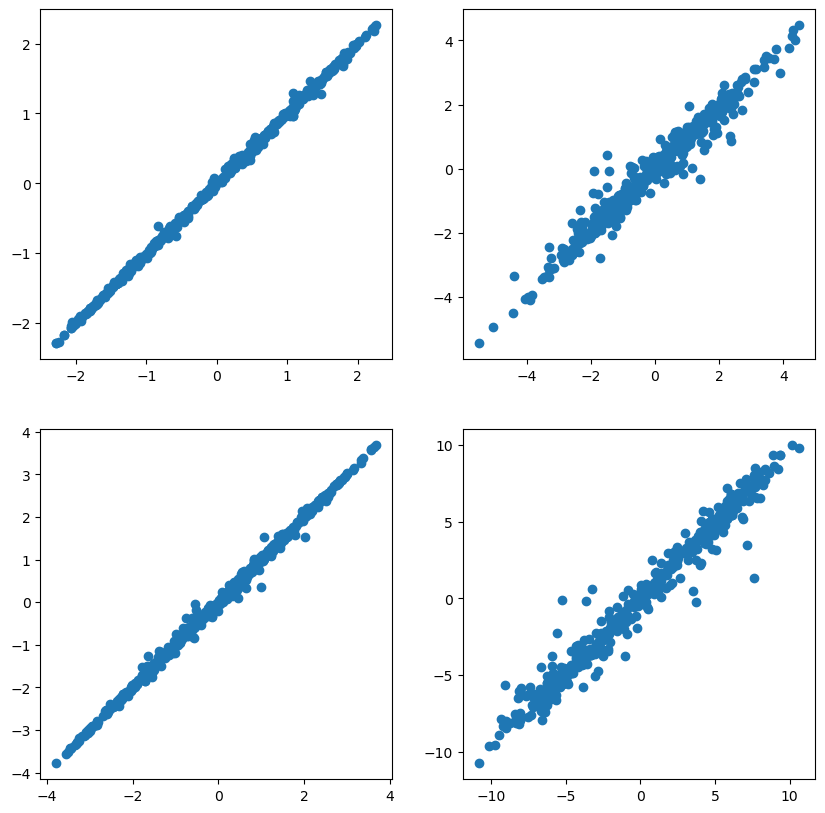

In [33]:
X_train, Y_train = XY_data_generation_action(500, seeds)

alpha_M, Xp_train = nonlinear_model(X_train, Y_train, M, std_list, lmda)

K_NM = kernel_compute(X_train, Xp_train, std_list)

Y_pred = K_NM @ alpha_M

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(Y_train.T[0], Y_pred.T[0])
ax[0,1].scatter(Y_train.T[1], Y_pred.T[1])
ax[1,0].scatter(Y_train.T[2], Y_pred.T[2])
ax[1,1].scatter(Y_train.T[3], Y_pred.T[3])
plt.show()

In [24]:
# Now we need to find the optimal values for the length
# scale hyperparameters


# Write function for computing the mean squared error for a particular
# set of parameters

def find_mse(X, Y, M, sig, lmda):
    alpha_M, Xp = nonlinear_model(X, Y, M, sig, lmda)
    K_NM = kernel_compute(X, Xp, sig)
    Y_pred = K_NM @ alpha_M
    mse = np.square(Y_pred-Y).mean(axis=0)
    return mse

# Multiply the standard deviation by various scale factors to
# perform the grid search over:

# scale_factors = np.geomspace(0.01, 100, 100)
# # List of 100 scale factors to multiply each standard deviation by



# We start by trying a grid search, to narrow down the optimal value for
# the sigmas

# # List of 5 scale factors to multiply each standard deviation by
# scale_factors = np.geomspace(0.1, 10, 5)


# sigma_range_0 = std_list[0] * scale_factors
# sigma_range_1 = std_list[1] * scale_factors
# sigma_range_2 = std_list[2] * scale_factors
# sigma_range_3 = std_list[3] * scale_factors

# # Manual grid search to find the optimal combination of sigmas
# # May take an inordinate amount of time to run

# opt_mse = np.inf
# opt_sig = []
# count = 1
# for s0 in sigma_range_0:
#     for s1 in sigma_range_1:
#         for s2 in sigma_range_2:
#             for s3 in sigma_range_3:
#                 sig = [s0, s1, s2, s3]
#                 mse = np.sum(find_mse(X_train, Y_train, M, sig, lmda))
#                 if mse < opt_mse:
#                     opt_mse = mse
#                     opt_sig = sig
#                 print(f"{count}/625", mse)
#                 count += 1

# print(opt_mse, opt_sig)

In [12]:
# We start by trying a grid search, to narrow down the optimal value for
# the sigmas

# List of 5 scale factors to multiply each standard deviation by
scale_factors = np.geomspace(0.1, 10, 5)


sigma_range_0 = std_list[0] * scale_factors
sigma_range_1 = std_list[1] * scale_factors
sigma_range_2 = std_list[2] * scale_factors
sigma_range_3 = std_list[3] * scale_factors

# Manual grid search to find the optimal combination of sigmas
# May take an inordinate amount of time to run

opt_mse = np.inf
opt_sig = []
count = 1
for s0 in sigma_range_0:
    for s1 in sigma_range_1:
        for s2 in sigma_range_2:
            for s3 in sigma_range_3:
                sig = [s0, s1, s2, s3]
                mse = np.sum(find_mse(X_train, Y_train, M, sig, lmda))
                if mse < opt_mse:
                    opt_mse = mse
                    opt_sig = sig
                print(f"{count}/625", mse)
                count += 1

print(opt_mse, opt_sig)

1/625 29.602148024590193
2/625 29.918644325954237
3/625 29.48911973502975
4/625 29.453858944892467
5/625 29.393080865796616
6/625 28.60633789722978
7/625 29.174432008017277
8/625 28.72493397245588
9/625 29.516717407323984
10/625 29.551911286573226
11/625 29.487045814092667
12/625 29.568539657669618
13/625 29.233267639400708
14/625 29.113886913366983
15/625 29.919418431896823
16/625 29.710536645690873
17/625 29.444436131769102
18/625 29.337151054017248
19/625 29.43572163338804
20/625 29.517431182084636
21/625 29.83639661018156
22/625 30.007901894799673
23/625 29.613356058853046
24/625 29.5386963106279
25/625 29.816342421845718
26/625 29.274322378791013
27/625 29.49350388924916
28/625 28.989898028002145
29/625 28.615341116756117
30/625 28.590022046947055
31/625 29.654974114546352
32/625 28.187679603849475
33/625 27.279485830403168
34/625 27.887983579540645
35/625 28.687929515005255
36/625 28.835646484830185
37/625 29.18149995528625
38/625 28.9443550034786
39/625 28.35083294524601
40/625 

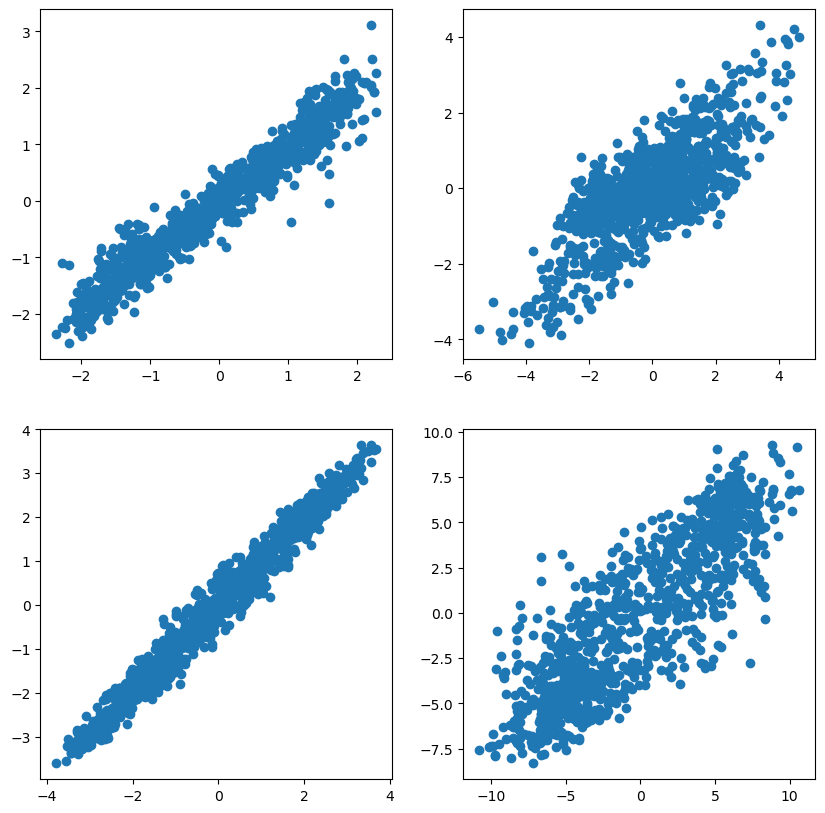

In [ ]:
M = 100 # Number of basis functions 

K_NM = kernel_compute(X_train, Xp_train, sig_opt)

Y_pred = K_NM @ alpha_M

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].scatter(Y_train.T[0], Y_pred.T[0])
ax[0,1].scatter(Y_train.T[1], Y_pred.T[1])
ax[1,0].scatter(Y_train.T[2], Y_pred.T[2])
ax[1,1].scatter(Y_train.T[3], Y_pred.T[3])
plt.show()

In [38]:
# We start by trying a grid search, to narrow down the optimal value for
# the sigmas

# List of 5 scale factors to multiply each standard deviation by
scale_factors = np.geomspace(0.1, 10, 5)


sigma_range_0 = std_list[0] * scale_factors
sigma_range_1 = std_list[1] * scale_factors
sigma_range_2 = std_list[2] * scale_factors
sigma_range_3 = std_list[3] * scale_factors

# Manual grid search to find the optimal combination of sigmas
# May take an inordinate amount of time to run

M = 500
opt_mse = np.inf
opt_sig = []
count = 1
for s0 in sigma_range_0:
    for s1 in sigma_range_1:
        for s2 in sigma_range_2:
            for s3 in sigma_range_3:
                sig = [s0, s1, s2, s3]
                mse = np.sum(find_mse(X_train, Y_train, M, sig, lmda))
                if mse < opt_mse:
                    opt_mse = mse
                    opt_sig = sig
                print(f"{count}/625", mse)
                count += 1

print(opt_mse, opt_sig)

1/625 15.876011422317635
2/625 16.153928248553736
3/625 13.912326220870685
4/625 14.44581701770647
5/625 14.184714904810509
6/625 16.214473846797926
7/625 13.906811011164448
8/625 12.652535205154646
9/625 13.814314057275013
10/625 13.657998964809902
11/625 16.56436628393724
12/625 15.060901239489027
13/625 13.785024655062383
14/625 13.486287589990685
15/625 15.733997367996992
16/625 16.404384127227715
17/625 15.581396544749367
18/625 15.874889545983162
19/625 15.459461463135748
20/625 15.18508199184376
21/625 16.22640099531995
22/625 15.766840767193898
23/625 15.122276127503863
24/625 15.937741319256357
25/625 15.715010542186121
26/625 16.07086428235685
27/625 13.069512928656131
28/625 11.400700500182815
29/625 12.239654227357406
30/625 13.056127380060783
31/625 13.55265356680875
32/625 11.702479824167995
33/625 8.43043660698687
34/625 10.372055549256785
35/625 11.912384419896249
36/625 15.078145418873858
37/625 12.798709209729825
38/625 10.756752820108726
39/625 9.949261876009428
40/6